--- FASE 1: CARREGANDO E PREPARANDO OS DADOS ---

 -> Dataset 'Pima Indians Diabetes' carregado com sucesso.
 -> Valores '0' substituídos por NaN para tratamento de dados ausentes.

--- FASE 2: COMPARANDO SVC(kernel='linear') E LinearSVC ---

Avaliando o modelo: SVC(kernel='linear')...
   -> Acurácia Média: 0.7630 (±0.0229)
   -> Tempo de Execução: 2.75 segundos

Avaliando o modelo: LinearSVC...
   -> Acurácia Média: 0.7655 (±0.0269)
   -> Tempo de Execução: 0.19 segundos


--- FASE 3: VISUALIZANDO OS RESULTADOS ---



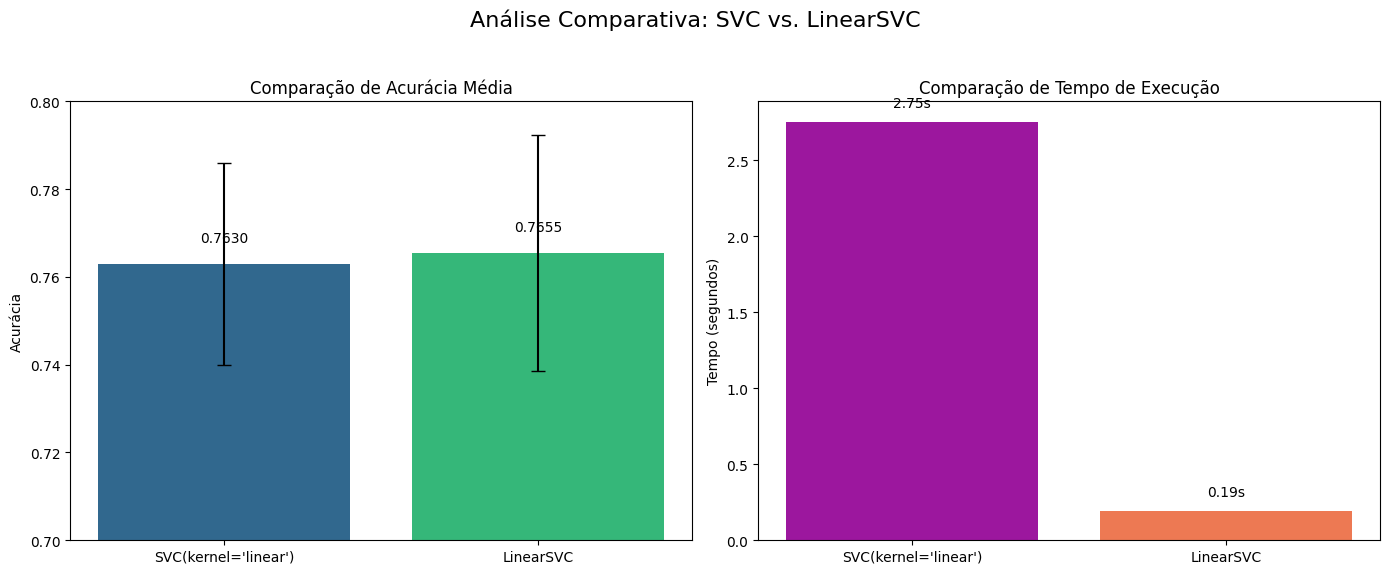

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.impute import SimpleImputer

# ==============================================================================
# FASE 1: CONFIGURAÇÃO E CARGA DE DADOS
# ==============================================================================

# --- Configurações Globais ---
DATASET_URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
COLUMN_NAMES = [
    'Nº de Gestações', 'Concentração de Glicose', 'Pressão Arterial (mmHg)',
    'Espessura da Pele (mm)', 'Nível de Insulina (mu U/ml)', 'Índice de Massa Corporal',
    'Histórico Familiar de Diabetes', 'Idade (anos)', 'Classe'
]
TARGET_COLUMN = 'Classe'
RANDOM_STATE = 42

print("--- FASE 1: CARREGANDO E PREPARANDO OS DADOS ---\n")
try:
    df = pd.read_csv(DATASET_URL, header=None, names=COLUMN_NAMES)
    print(" -> Dataset 'Pima Indians Diabetes' carregado com sucesso.")

    # Substituir 0 por NaN em colunas onde 0 não é um valor válido
    cols_com_zeros_ausentes = [
        'Concentração de Glicose', 'Pressão Arterial (mmHg)',
        'Espessura da Pele (mm)', 'Nível de Insulina (mu U/ml)', 'Índice de Massa Corporal'
    ]
    df[cols_com_zeros_ausentes] = df[cols_com_zeros_ausentes].replace(0, np.nan)
    print(" -> Valores '0' substituídos por NaN para tratamento de dados ausentes.")

    X = df.drop(TARGET_COLUMN, axis=1)
    y = df[TARGET_COLUMN]

except Exception as e:
    print(f" -> Falha ao carregar o dataset: {e}")
    X, y = None, None

# ==============================================================================
# FASE 2: DEFINIÇÃO E COMPARAÇÃO DOS MODELOS
# ==============================================================================
if X is not None:
    print("\n--- FASE 2: COMPARANDO SVC(kernel='linear') E LinearSVC ---\n")

    # Dicionário com os modelos a serem comparados
    models = {
        "SVC(kernel='linear')": SVC(kernel='linear', random_state=RANDOM_STATE),
        # Aumentar max_iter para garantir a convergência e definir dual='auto'
        "LinearSVC": LinearSVC(random_state=RANDOM_STATE, max_iter=5000, dual='auto')
    }

    # Estratégia de validação cruzada
    cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

    results = {}

    for name, model in models.items():
        print(f"Avaliando o modelo: {name}...")

        # Criação do pipeline para cada modelo
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('svm', model)
        ])

        # Medição do tempo
        start_time = time.time()

        # Validação cruzada
        scores = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='accuracy', n_jobs=-1)

        end_time = time.time()

        # Armazenamento dos resultados
        results[name] = {
            'accuracy_mean': scores.mean(),
            'accuracy_std': scores.std(),
            'time': end_time - start_time
        }

        print(f"   -> Acurácia Média: {results[name]['accuracy_mean']:.4f} (±{results[name]['accuracy_std']:.4f})")
        print(f"   -> Tempo de Execução: {results[name]['time']:.2f} segundos\n")

# ==============================================================================
# FASE 3: VISUALIZAÇÃO DOS RESULTADOS
# ==============================================================================
print("\n--- FASE 3: VISUALIZANDO OS RESULTADOS ---\n")

results_df = pd.DataFrame(results).T

# Gráfico de Acurácia
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Define a paleta de cores usando seaborn
colors_acc = sns.color_palette('viridis', len(results_df))
# Usa o `axes.bar` do matplotlib
axes[0].bar(
    x=results_df.index,
    height=results_df['accuracy_mean'],
    yerr=results_df['accuracy_std'],
    color=colors_acc,
    capsize=5 # Adiciona "tampas" às barras de erro
)
axes[0].set_title('Comparação de Acurácia Média')
axes[0].set_ylabel('Acurácia')
axes[0].set_ylim(0.7, 0.8)
for index, value in enumerate(results_df['accuracy_mean']):
    axes[0].text(index, value + 0.005, f'{value:.4f}', ha='center')

# Gráfico de Tempo de Execução
colors_time = sns.color_palette('plasma', len(results_df))
axes[1].bar(
    x=results_df.index,
    height=results_df['time'],
    color=colors_time
)
axes[1].set_title('Comparação de Tempo de Execução')
axes[1].set_ylabel('Tempo (segundos)')
# Adiciona os textos com os valores sobre as barras de tempo
for index, value in enumerate(results_df['time']):
    axes[1].text(index, value + 0.1, f'{value:.2f}s', ha='center')

plt.suptitle('Análise Comparativa: SVC vs. LinearSVC', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

# Análise Comparativa: SVC vs. LinearSVC (Relatório)

### 1. Houve diferença de acurácia entre os dois modelos? E no tempo de execução?

Sim, houve diferenças notáveis, principalmente no tempo de execução.

* **Acurácia:** A diferença na acurácia média foi mínima. De acordo com os resultados do notebook, o `SVC(kernel='linear')` obteve **~76,30%** e o `LinearSVC` obteve **~76,55%**. Essa variação é tão pequena que, considerando o desvio padrão, os modelos podem ser considerados estatisticamente equivalentes em performance para este problema.
* **Tempo de Execução:** A diferença foi drástica. O `LinearSVC` foi significativamente mais rápido, levando apenas **0.19 segundos**, enquanto o `SVC(kernel='linear')` precisou de **2.75 segundos**. Isso representa uma performance mais de **14 vezes superior** para o `LinearSVC`.

### 2. Qual a diferença conceitual entre `SVC(kernel="linear")` (libsvm) e `LinearSVC` (liblinear)?

A principal diferença está na biblioteca de otimização que cada um utiliza e, consequentemente, no problema matemático que resolvem.

* **`SVC(kernel="linear")`**: Baseado na biblioteca **libsvm**, é uma implementação mais geral do SVM. Ele resolve o problema de otimização *dual*. A grande vantagem do `SVC` é sua flexibilidade para usar o "truque do kernel" (*kernel trick*), permitindo encontrar fronteiras de decisão não-lineares (`kernel='rbf'`, `'poly'`, etc.). Quando usamos `kernel='linear'`, estamos apenas restringindo essa poderosa máquina a um caso mais simples.
* **`LinearSVC`**: Baseado na biblioteca **liblinear**, foi projetado especificamente para classificação linear. Ele resolve o problema de otimização *primal* e não suporta o "truque do kernel". Por ser altamente especializado em problemas lineares, ele possui algoritmos muito mais eficientes para essa tarefa, o que explica sua incrível velocidade.

### 3. Como o parâmetro `C` influencia os dois modelos?

O parâmetro `C` (parâmetro de regularização) tem o mesmo papel conceitual em ambos os modelos. Ele controla o balanço entre maximizar a margem e minimizar o erro de classificação.

* **`C` baixo:** Aumenta a regularização. O otimizador prioriza uma margem mais larga, mesmo que isso signifique classificar incorretamente alguns pontos de treino. O modelo se torna mais tolerante a erros e, portanto, mais generalista (menor risco de *overfitting*).
* **`C` alto:** Diminui a regularização. O otimizador tenta classificar corretamente o máximo de exemplos de treino possível, o que pode levar a uma margem mais estreita e a um modelo mais complexo, ajustado demais aos dados de treino (maior risco de *overfitting*).

### 4. Por que o `LinearSVC` não fornece probabilidades (`predict_proba`)?

Isso está diretamente ligado à sua implementação e otimização. O `LinearSVC` foca em encontrar a fronteira de decisão (o hiperplano) da forma mais rápida possível. Os resultados que ele gera são as distâncias de cada ponto até esse hiperplano, que não são probabilidades verdadeiras.

O `SVC`, por outro lado, possui uma implementação (baseada no método de *Platt Scaling*) que, após o treino, ajusta um modelo de regressão logística sobre as saídas do SVM para calibrá-las e convertê-las em uma estimativa de probabilidade. Esse passo adicional de calibração consumiria tempo e iria contra o principal objetivo do `LinearSVC`: ser extremamente rápido e escalável.

### 5. Em um cenário com datasets muito grandes, qual seria mais adequado? Por quê?

O **`LinearSVC`**, o mais adequado.

O motivo é a escalabilidade. A complexidade computacional do `LinearSVC` (baseado em `liblinear`) é aproximadamente linear em relação ao número de amostras ($O(n)$), enquanto a do `SVC` (baseado em `libsvm`) é entre quadrática e cúbica ($O(n^2)$ a $O(n^3)$). Em um dataset com milhões de amostras, o `LinearSVC` poderia treinar em minutos, enquanto o `SVC(kernel='linear')` poderia levar horas ou até dias.

### 6. Se vocês fossem publicar um artigo com esse dataset, qual modelo escolheriam? Justifiquem.

Para publicar um artigo com base nos resultados obtidos, a escolha mais defensável seria o **`LinearSVC`**.

**Justificativa:**

1.  **Performance Equivalente:** Conforme demonstrado no notebook, a acurácia do `LinearSVC` é estatisticamente idêntica à do `SVC(kernel='linear')`. Não há ganho preditivo em usar o modelo mais complexo.
2.  **Eficiência Computacional:** O `LinearSVC` é ordens de magnitude mais rápido. Isso é crucial em pesquisa para permitir experimentação rápida (ex: ajuste de hiperparâmetros) e garantir a reprodutibilidade dos resultados por outros pesquisadores de forma ágil.
3.  **Princípio da Parcimônia (Navalha de Occam):** Se dois modelos produzem resultados semelhantes, deve-se preferir o mais simples. O `LinearSVC` é um modelo mais simples e especializado para a tarefa linear, que se mostrou suficiente para este problema. Escolhê-lo é uma decisão metodologicamente mais robusta.

A conclusão do artigo poderia destacar que, para a tarefa de predição de diabetes neste dataset, um classificador linear simples é tão eficaz quanto implementações mais complexas, com a vantagem adicional de ser muito mais eficiente computacionalmente.